In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/mobile_phone.csv')
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


In [8]:
df['create_date'][0].split('-')  #미호님

['2017', '03', '19  4 35 00 PM']

In [9]:
df.iloc[:,0][0][:7]  # 승희

'2017-03'

In [10]:
df['yearmonth'] =  df['create_date'].apply(lambda x: x[:7])

In [11]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,yearmonth
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04


In [12]:
# 년도별 일별 거래 횟수
df_yearmonth = df['yearmonth'].value_counts()
df_yearmonth.head()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
Name: yearmonth, dtype: int64

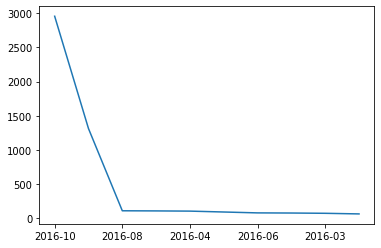

In [13]:
# 년도별 일별 거래횟수  그래프  시계열 속성의 데이터는 정렬 안된 데이터 시각화는 무의미
df_yearmonth.plot()
plt.show()

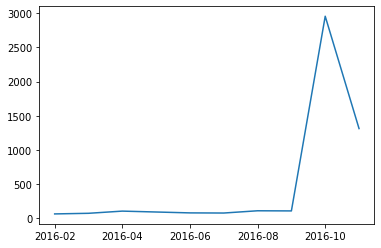

In [14]:
df_yearmonth.sort_index(ascending=True).plot()
plt.show()

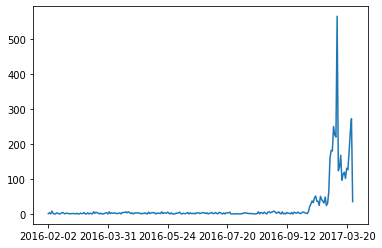

In [15]:
df_yearmonthday =  df['create_date'].apply(lambda x : x[:10]).value_counts()
df_yearmonthday.sort_index(ascending = True).plot()
plt.show()

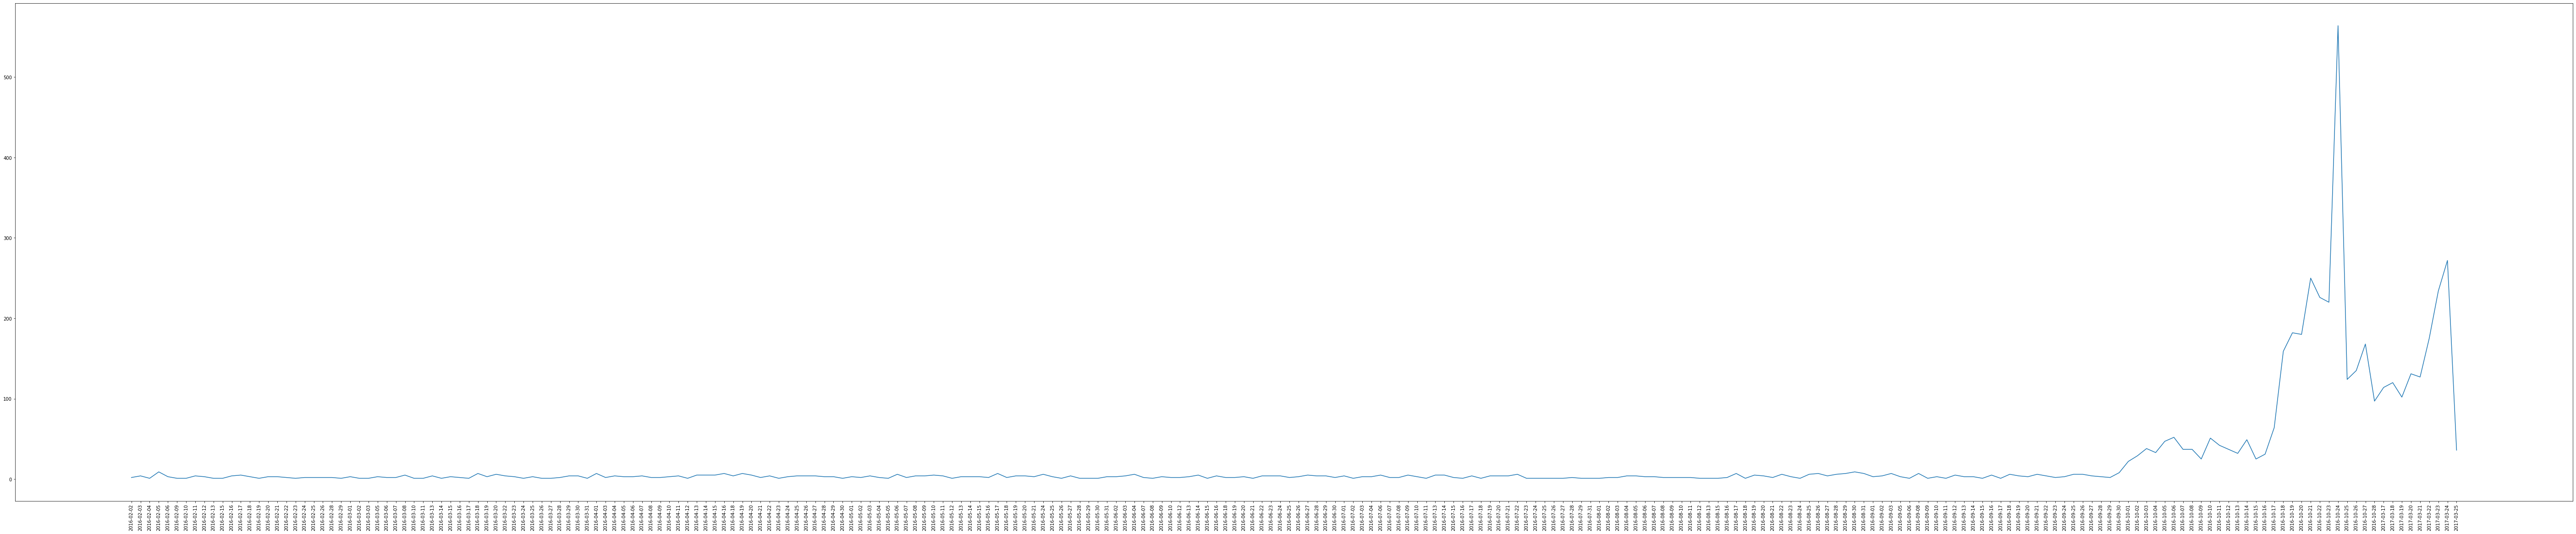

In [16]:
df_yearmonthday = df_yearmonthday.sort_index()

plt.figure(figsize=(100,20))
plt.plot(df_yearmonthday.index, df_yearmonthday.values)
plt.xticks(rotation=90)
plt.show()


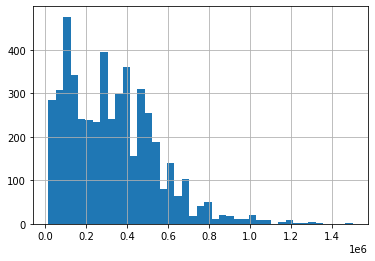

In [17]:
# 가격 피처 탐색
df['price'].hist(bins="auto")
plt.show()

In [18]:
df['price'].head()


0    550000.0
1    380000.0
2    300000.0
3    290000.0
4    280000.0
Name: price, dtype: float64

In [19]:
# 모델 별 가격
df_model_price = df.groupby('phone_model')['price'].mean()
df_model_price

phone_model
g pro2 32gb             90142.857143
g3 cat.6 32gb          110325.777778
g4 32gb                154842.105263
galaxy a7 2016 16gb    283636.363636
galaxy a8 2016 32gb    211125.000000
                           ...      
vega secret up 16gb    134565.217391
wine smart jazz 4gb     91194.531250
xperia z3 16gb         230000.000000
xperia z3 32gb         193571.428571
y6 8gb                 111857.142857
Name: price, Length: 64, dtype: float64

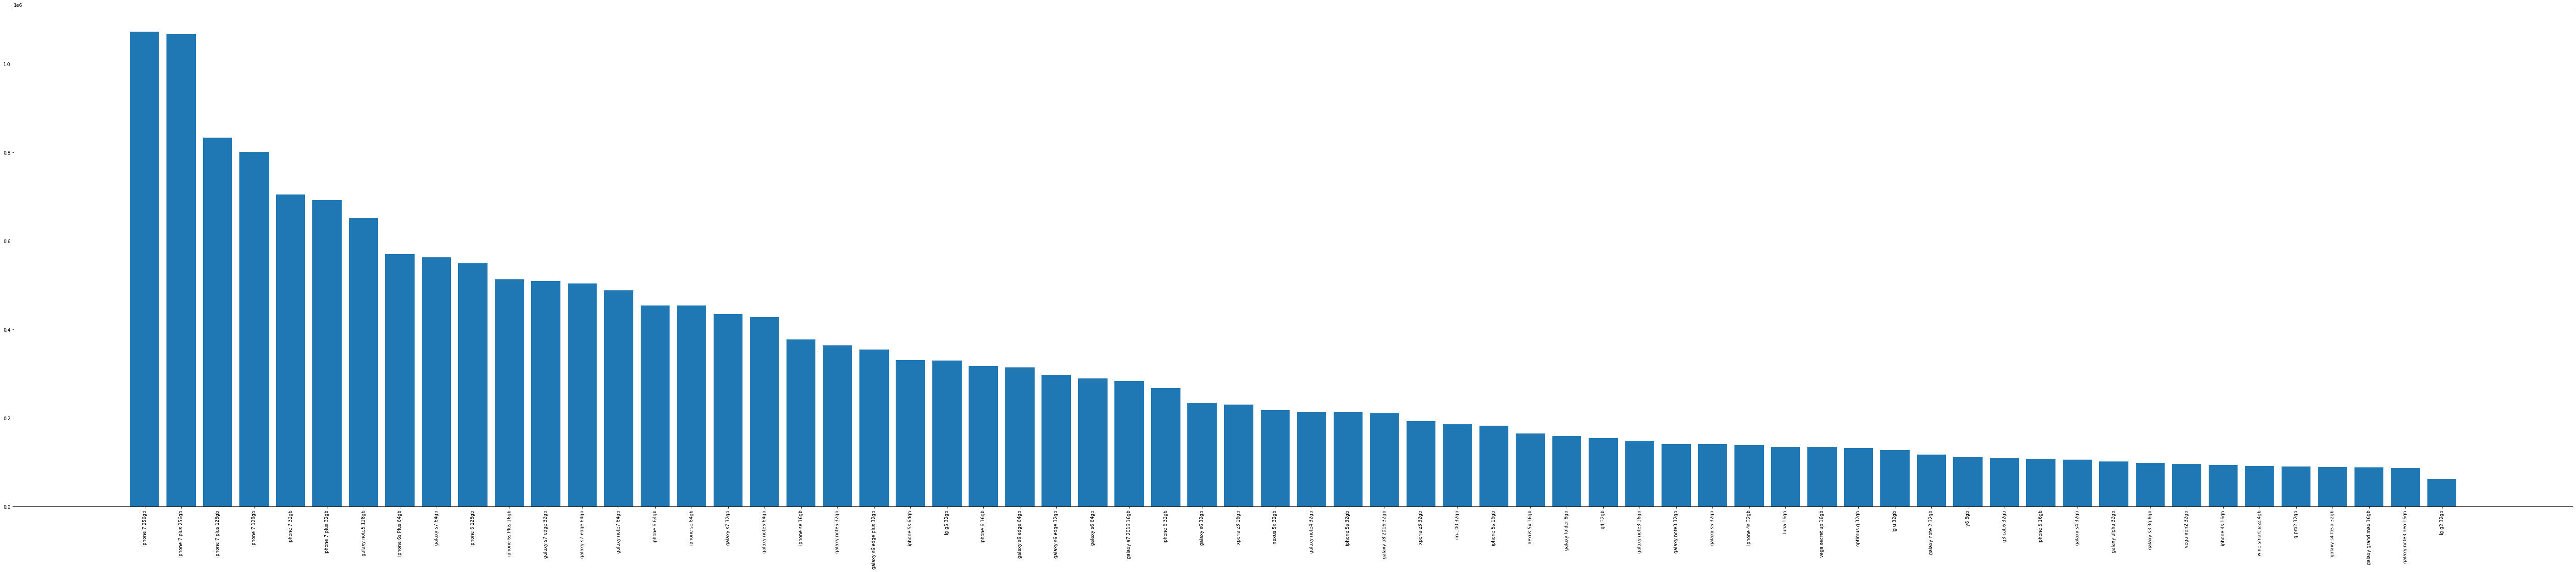

In [20]:
plt.figure(figsize=(100,20))
df_model_price  = df_model_price.sort_values(ascending=False)
plt.bar(df_model_price.index, df_model_price.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

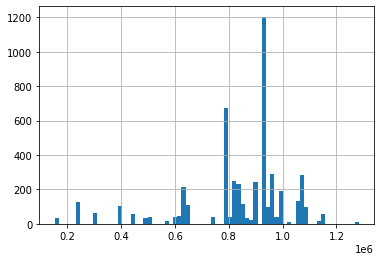

In [21]:
# 출고가.. 위와같이 시각화의 의미가 없다. 
# value로만 이루어진 데이터의 시각화 --> histogram
df['factory_price'].hist(bins="auto")

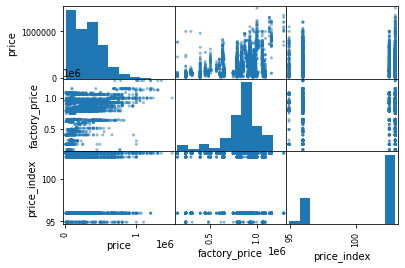

                  price  factory_price  price_index
price          1.000000       0.339306     0.025516
factory_price  0.339306       1.000000    -0.011648
price_index    0.025516      -0.011648     1.000000


In [22]:
# 모든 피처들의 상관관계
corr_matrix =  df.corr()
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()
print(corr_matrix)
# 모델별 거래 데이터 -- box plot
# 가격 예측.......  Random Forest를 이용해서 가격 예측...
# 다른걸 생각해 오기....  그걸 수업시간에 같이 적용해 보기.
# 중요피처는 뭐가 있을까?

In [23]:
corr_matrix['factory_price'].sort_values(ascending=False)

factory_price    1.000000
price            0.339306
price_index     -0.011648
Name: factory_price, dtype: float64

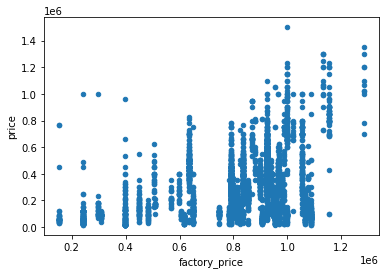

In [24]:
df.plot.scatter(x='factory_price', y = 'price')
plt.show()

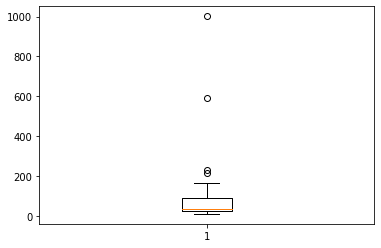

In [25]:
# 기종별 거래 데이터 개수
model_counts = df['phone_model'].value_counts()
model_counts.describe()  # 기술통계량
plt.boxplot(model_counts)
plt.show()

In [26]:
# 가격 예측
# RandomForest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [27]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,yearmonth
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
 7   yearmonth      4951 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 309.6+ KB


In [29]:
# pd.concat([df.iloc[:, 1], df.iloc[:, 3:]], axis=1) 
df = df.drop(['create_date','text'], axis = 1)
df.head()

,price,phone_model,factory_price,maker,price_index,yearmonth
0,550000.0,iphone 6 64gb,924000,apple,95.96,2017-03
1,380000.0,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,300000.0,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,290000.0,lg g5 32gb,836000,lg,95.96,2017-03
4,280000.0,lg u 32gb,396000,lg,102.59,2016-04


In [30]:
y = df['price']
x = df.iloc[:,1:]
x.shape, y.shape

((4951, 5), (4951,))

In [31]:
# 문자열 데이터는 ont hot encoding
x = pd.get_dummies(x,columns=['phone_model','maker','yearmonth'])
print(x.shape)
x.head()

(4951, 84)


,factory_price,price_index,phone_model_g pro2 32gb,phone_model_g3 cat.6 32gb,phone_model_g4 32gb,phone_model_galaxy a7 2016 16gb,phone_model_galaxy a8 2016 32gb,phone_model_galaxy alpha 32gb,phone_model_galaxy folder 8gb,phone_model_galaxy grand max 16gb,...,yearmonth_2016-02,yearmonth_2016-03,yearmonth_2016-04,yearmonth_2016-05,yearmonth_2016-06,yearmonth_2016-07,yearmonth_2016-08,yearmonth_2016-09,yearmonth_2016-10,yearmonth_2017-03
0,924000,95.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,979000,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,854000,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,836000,95.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,396000,102.59,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
# 학습용과 훈련용 데이터를 분리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)
x_train,x_target,y_train,y_target =  train_test_split(x_scaled,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape, x_target.shape, y_target.shape

((3960, 84), (3960,), (991, 84), (991,))

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr =  RandomForestRegressor(criterion='mse',n_estimators=1000)
rfr.fit(x_train,y_train)
y_train_predic =  rfr.predict(x_train)
y_target_predic = rfr.predict(x_target)

In [34]:
from sklearn.metrics import mean_squared_error
y_train_mse =  mean_squared_error(y_train,y_train_predic)
y_target_mse = mean_squared_error(y_target,y_target_predic)

In [35]:
print(f"MSE train : {y_train_mse}  target : {y_target_mse}")

MSE train : 11404366112.575712  target : 11753625853.70365


In [36]:
rfr.score(x_train,y_train), rfr.score(x_target,y_target)

(0.7571572322351675, 0.7523623789695955)

In [37]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
from sklearn.metrics import r2_score


In [39]:
y_train_mse =  r2_score(y_train,y_train_predic)
y_target_mse = r2_score(y_target,y_target_predic)
print(f"r2_score train : {y_train_mse}  r2_score : {y_target_mse}")

r2_score train : 0.7571572322351675  r2_score : 0.7523623789695955


In [40]:
x.columns

Index(['factory_price', 'price_index', 'phone_model_g pro2 32gb',
       'phone_model_g3 cat.6 32gb', 'phone_model_g4 32gb',
       'phone_model_galaxy a7 2016 16gb', 'phone_model_galaxy a8 2016 32gb',
       'phone_model_galaxy alpha 32gb', 'phone_model_galaxy folder 8gb',
       'phone_model_galaxy grand max 16gb', 'phone_model_galaxy note 2 32gb',
       'phone_model_galaxy note3 16gb', 'phone_model_galaxy note3 32gb',
       'phone_model_galaxy note3 neo 16gb', 'phone_model_galaxy note4 32gb',
       'phone_model_galaxy note5 128gb', 'phone_model_galaxy note5 32gb',
       'phone_model_galaxy note5 64gb', 'phone_model_galaxy note7 64gb',
       'phone_model_galaxy s3 3g 8gb', 'phone_model_galaxy s4 32gb',
       'phone_model_galaxy s4 lte-a 32gb', 'phone_model_galaxy s5 32gb',
       'phone_model_galaxy s6 32gb', 'phone_model_galaxy s6 64gb',
       'phone_model_galaxy s6 edge 32gb', 'phone_model_galaxy s6 edge 64gb',
       'phone_model_galaxy s6 edge plus 32gb', 'phone_model_gala

In [41]:
importances =  rfr.feature_importances_
importances



array([3.88477635e-01, 2.18830912e-02, 1.13739862e-03, 3.13957561e-04,
       4.16654905e-04, 3.13590916e-03, 1.81150482e-03, 2.81115425e-05,
       1.40128182e-03, 4.17889323e-05, 2.00016065e-04, 6.17453168e-05,
       1.37437184e-04, 2.61762469e-05, 4.29787366e-03, 6.75654672e-03,
       9.78636856e-04, 3.84397409e-03, 4.77621669e-03, 1.98824750e-02,
       2.09656002e-02, 1.47176930e-05, 2.66446775e-03, 1.14940190e-02,
       1.59429633e-03, 2.21885353e-03, 1.55513547e-03, 4.83123275e-04,
       1.56888429e-03, 2.82543091e-03, 1.39011684e-02, 4.05476948e-03,
       4.27498077e-04, 1.66731898e-04, 3.08022795e-04, 1.53863488e-03,
       9.39712381e-04, 4.69348994e-05, 1.04086566e-02, 1.64729458e-02,
       9.50107868e-03, 1.33173235e-03, 7.89735747e-03, 4.37731671e-03,
       1.99620957e-03, 1.86943423e-03, 1.39689141e-03, 6.22652764e-03,
       2.64479557e-03, 1.11103159e-03, 1.67715844e-03, 2.14365230e-03,
       2.62543046e-02, 6.11409105e-04, 4.89174611e-03, 1.61875335e-03,
      

In [42]:
indexs = np.argsort(importances)[::-1]
x.shape

(4951, 84)

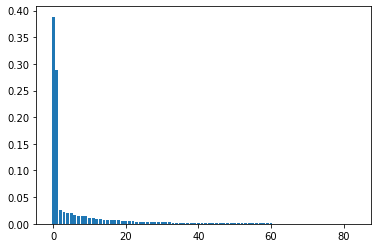

In [43]:
plt.bar(range(x.shape[1]), importances[indexs])
plt.show()

In [44]:
# 학습한 모델의 피처의 중요도를 출력
feature_cols =  x.columns.tolist()
feature =  list(zip(feature_cols, rfr.feature_importances_))
sorted(feature, key=lambda f: f[1],reverse=True)[:10] 

[('factory_price', 0.3884776350400665),
 ('maker_apple', 0.28933848633497516),
 ('phone_model_iphone se 64gb', 0.026254304613538195),
 ('price_index', 0.021883091167535014),
 ('phone_model_galaxy s4 32gb', 0.020965600218735406),
 ('phone_model_galaxy s3 3g 8gb', 0.019882474966441025),
 ('phone_model_iphone 6 128gb', 0.016472945759771047),
 ('maker_samsung', 0.015126935411855006),
 ('yearmonth_2017-03', 0.014842632567426758),
 ('phone_model_galaxy s7 edge 32gb', 0.013901168378973199)]

In [45]:
for sorted_feature in sorted(feature, key=lambda f: f[1],reverse=True):
    if 'month' in sorted_feature[0]:
        print(sorted_feature)

('yearmonth_2017-03', 0.014842632567426758)
('yearmonth_2016-05', 0.009649142168730678)
('yearmonth_2016-09', 0.0069420130910077225)
('yearmonth_2016-04', 0.006343907211905225)
('yearmonth_2016-10', 0.005935190274511903)
('yearmonth_2016-06', 0.004094891046150038)
('yearmonth_2016-07', 0.003597228947613727)
('yearmonth_2016-08', 0.0032705522346269224)
('yearmonth_2016-03', 0.0017206950414576571)
('yearmonth_2016-02', 0.0011880850674391402)


In [46]:
y_train_predic =  rfr.predict(x_train)
y_target_predic = rfr.predict(x_target)

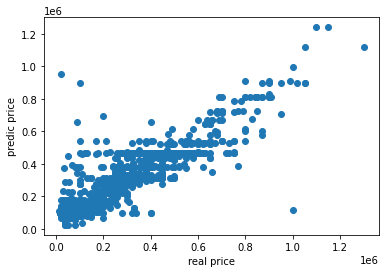

In [47]:
# target에 대한 예측값의 결과 시각화
plt.scatter(y_target,y_target_predic)
plt.xlabel('real price')
plt.ylabel('predic price')
plt.show()
#matplot 한글...

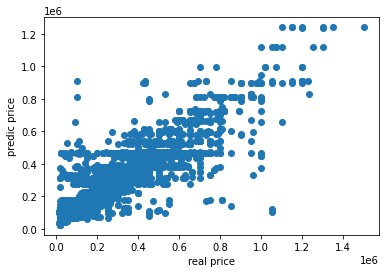

In [48]:
# target에 대한 예측값의 결과 시각화
plt.scatter(y_train,y_train_predic)
plt.xlabel('real price')
plt.ylabel('predic price')
plt.show()

In [49]:
# 1. 하이퍼 파라메터 튜닝
# 2. 중요 Feature 골랐으니...... 중요 reature 로만 다시 재학습
# 3. PCA 차원축소

In [50]:
# 모델개선.. 

In [51]:
# 1. 하이퍼 파라메터 튜닝
from sklearn.model_selection import GridSearchCV

In [52]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [71]:
np.arange(100,2000,100)

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])

In [72]:
param = {
      'n_estimators' : np.arange(100,2000,100)
        #'max_features' : ['auto','sqrt'],
        #'max_depth': [int(i) for i in np.linspace(start=10,stop=110,num=3)]
        #'bootstrap' : [True, False]
}

gsc =  GridSearchCV(rfr,param_grid=param)

In [74]:
gsc.fit(x_train,y_train)

In [68]:
gsc.best_params_

{'n_estimators': 1100}

In [69]:
gsc.best_score_

0.6982652554236605

In [77]:
# 가격 예측
x_train[0], y_train[0]

(array([-0.44098576,  0.65781394, -0.08437778, -0.1214789 , -0.13986932,
        -0.06680853, -0.09024955, 11.37055292, -0.07807895, -0.08437778,
        -0.13986932, -0.0697934 , -0.2212254 , -0.07937766, -0.11168902,
        -0.06040609, -0.1868369 , -0.10695908, -0.09138001, -0.12233213,
        -0.14648062, -0.0551262 , -0.07404962, -0.15282918, -0.11975527,
        -0.09024955, -0.07404962, -0.08191486, -0.14933261, -0.06368652,
        -0.14210452, -0.07123982, -0.07123982, -0.04718814, -0.0551262 ,
        -0.08558339, -0.16806269, -0.07937766, -0.0551262 , -0.14648062,
        -0.36817178, -0.04498757, -0.50372127, -0.0492914 , -0.07807895,
        -0.1352968 , -0.05869821, -0.08065598, -0.10695908, -0.04718814,
        -0.0492914 , -0.0697934 , -0.2135831 , -0.09577287, -0.15827748,
        -0.14061803, -0.0754161 , -0.05693986, -0.06206764, -0.10100495,
        -0.08315519, -0.06831697, -0.16290948, -0.06831697, -0.05325157,
        -0.08437778, -0.98975156, -0.08437778, -0.3

In [95]:
print(rfr.predict(x_train[4].reshape(-1,84)))



[466466.80368624]


In [99]:
x.columns

Index(['factory_price', 'price_index', 'phone_model_g pro2 32gb',
       'phone_model_g3 cat.6 32gb', 'phone_model_g4 32gb',
       'phone_model_galaxy a7 2016 16gb', 'phone_model_galaxy a8 2016 32gb',
       'phone_model_galaxy alpha 32gb', 'phone_model_galaxy folder 8gb',
       'phone_model_galaxy grand max 16gb', 'phone_model_galaxy note 2 32gb',
       'phone_model_galaxy note3 16gb', 'phone_model_galaxy note3 32gb',
       'phone_model_galaxy note3 neo 16gb', 'phone_model_galaxy note4 32gb',
       'phone_model_galaxy note5 128gb', 'phone_model_galaxy note5 32gb',
       'phone_model_galaxy note5 64gb', 'phone_model_galaxy note7 64gb',
       'phone_model_galaxy s3 3g 8gb', 'phone_model_galaxy s4 32gb',
       'phone_model_galaxy s4 lte-a 32gb', 'phone_model_galaxy s5 32gb',
       'phone_model_galaxy s6 32gb', 'phone_model_galaxy s6 64gb',
       'phone_model_galaxy s6 edge 32gb', 'phone_model_galaxy s6 edge 64gb',
       'phone_model_galaxy s6 edge plus 32gb', 'phone_model_gala

In [100]:
x_train[4]

array([ 0.44267769,  0.65781394, -0.08437778, -0.1214789 , -0.13986932,
       -0.06680853, -0.09024955, -0.08794647, -0.07807895, -0.08437778,
       -0.13986932, -0.0697934 , -0.2212254 , -0.07937766, -0.11168902,
       -0.06040609, -0.1868369 , -0.10695908, -0.09138001, -0.12233213,
       -0.14648062, -0.0551262 , -0.07404962, -0.15282918, -0.11975527,
       -0.09024955, -0.07404962, -0.08191486, -0.14933261, -0.06368652,
       -0.14210452, -0.07123982, -0.07123982, -0.04718814, -0.0551262 ,
       -0.08558339, -0.16806269, -0.07937766, -0.0551262 , -0.14648062,
       -0.36817178, -0.04498757,  1.98522486, -0.0492914 , -0.07807895,
       -0.1352968 , -0.05869821, -0.08065598, -0.10695908, -0.04718814,
       -0.0492914 , -0.0697934 , -0.2135831 , -0.09577287, -0.15827748,
       -0.14061803, -0.0754161 , -0.05693986, -0.06206764, -0.10100495,
       -0.08315519, -0.06831697, -0.16290948, -0.06831697, -0.05325157,
       -0.08437778,  1.01035455, -0.08437778, -0.3979945 , -0.10

In [108]:
feature = np.zeros(84)
feature[0] = 0.44267769

In [110]:
rfr.predict( feature.reshape(-1,84))

array([158067.47659043])

In [151]:
# x.iloc[0,:], y[0]

#print(x.columns)
# 예측데이터
#userData = np.zeros(84)
# 공장도 가격
# 판매지수 : 평균
# 모델 및 세부사양
# if  galaxy s4  32
# 희망 거래 년 월

def predictSales(user_factory_price, user_model_detail, user_model_storage, user_date):
    userData = np.zeros(84)
    userData[0] = user_factory_price
    userData[1] = df['price_index'].mean()    
    model = ' '.join(['phone_model_'+user_model_detail,user_model_storage])
    year = ''.join(['yearmonth_',user_date])
    model_index = np.where(np.array(x.columns) == model)                
    year_index = np.where(np.array(x.columns) == year)                
    userData[model_index] = 1
    userData[year_index] = 1
    return rfr.predict(userData.reshape(-1,84))
    
   
    
user_factory_price = 1200000
user_model_detail = "galaxy note3"
user_model_storage = "16gb"
user_date = "2016-08"
predictSales(120000,"galaxy note3","16gb","2017-05")

array([123831.83134682])

In [142]:
np.where(np.array(x.columns) == 'yearmonth_2016-02')

(array([74], dtype=int64),)

In [152]:
x.columns

Index(['factory_price', 'price_index', 'phone_model_g pro2 32gb',
       'phone_model_g3 cat.6 32gb', 'phone_model_g4 32gb',
       'phone_model_galaxy a7 2016 16gb', 'phone_model_galaxy a8 2016 32gb',
       'phone_model_galaxy alpha 32gb', 'phone_model_galaxy folder 8gb',
       'phone_model_galaxy grand max 16gb', 'phone_model_galaxy note 2 32gb',
       'phone_model_galaxy note3 16gb', 'phone_model_galaxy note3 32gb',
       'phone_model_galaxy note3 neo 16gb', 'phone_model_galaxy note4 32gb',
       'phone_model_galaxy note5 128gb', 'phone_model_galaxy note5 32gb',
       'phone_model_galaxy note5 64gb', 'phone_model_galaxy note7 64gb',
       'phone_model_galaxy s3 3g 8gb', 'phone_model_galaxy s4 32gb',
       'phone_model_galaxy s4 lte-a 32gb', 'phone_model_galaxy s5 32gb',
       'phone_model_galaxy s6 32gb', 'phone_model_galaxy s6 64gb',
       'phone_model_galaxy s6 edge 32gb', 'phone_model_galaxy s6 edge 64gb',
       'phone_model_galaxy s6 edge plus 32gb', 'phone_model_gala